# Topics

## 1. Sound in Python 

## Sound is no more or less than a numpy array

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# -----> new imports!!!!
import os
from scipy.io.wavfile import write

In [2]:
# Dutch ("tumbler") for bottlenose dolphin
# returns 0 indicating execution successful
# os.system("afplay tuimelaar.wav") 

# for non-Mac students, use this:
from IPython.lib.display import Audio
Audio("tuimelaar.wav")


## Sound at a single frequency:

## $$\sin(2\pi f_{1}t)$$

## or 

## $$\cos(2\pi f_{1}t)$$

## Small Breakout  
   ### - Generate a sound wave with a frequency of 3 Hz and is 4 second long 
   ### - Plot this wave

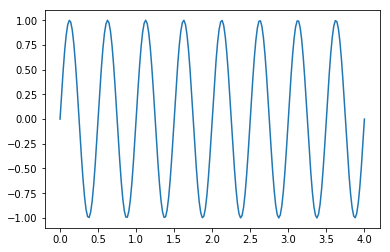

In [10]:
def mav(f, t):
    return np.sin(2 * np.pi * f * t)

freq = 2

time = np.linspace(0, 4, 200)

sound = mav(freq, time)
plt.figure()
plt.plot(time, sound)
plt.show()

In [11]:
freq = 440.
# number of points per second
# Audio CD, also most commonly used with MPEG-1 audio (VCD, SVCD, MP3)
# Or sampling frequency -- this is twice as high 
# as the highest frequency the human ear can hear
sample_rate = 44100

# a 3 second long signal
duration = 4
# make sure you understand what linspace generates here
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**4
Atone = amp*np.sin(np.pi*2*freq*time_pts)
write('Atone.wav', sample_rate, Atone)
# The following only works on Mac
#os.system("afplay Atone.wav") 

# for non-Mac students:
Audio(Atone, rate = sample_rate)

In [12]:
'''Play the A tone at 440 Hz '''

freq = 440.
# number of points per second
# Audio CD, also most commonly used with MPEG-1 audio (VCD, SVCD, MP3)
# Or sampling frequency -- this is twice as high 
# as the highest frequency the human ear can hear
sample_rate = 44100

# a 3 second long signal
duration = 3
# make sure you understand what linspace generates here
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**4
Atone = amp*np.sin(np.pi*2*freq*time_pts)
write('Atone.wav', sample_rate, Atone)
# The following only works on Mac
#os.system("afplay Atone.wav") 

# for non-Mac students:
Audio(Atone, rate = sample_rate)

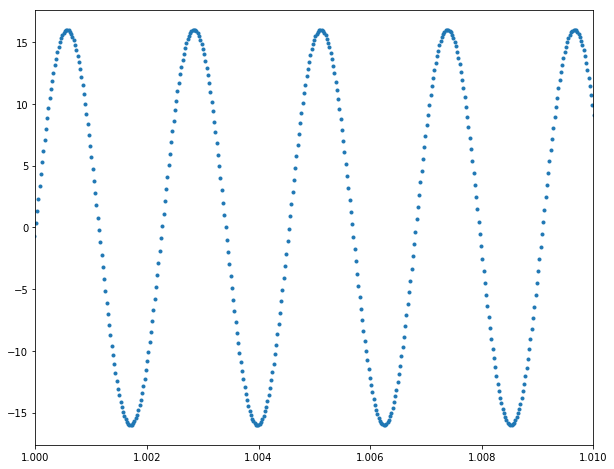

In [17]:
'''plotting sound wave vs. time'''

plt.figure(figsize = (10, 8))
plt.plot(time_pts, Atone, '.')

# The freq is too high!  So let's set xlim:
plt.xlim((1., 1.01))

plt.show()

In [14]:
'''
Shifting the sound wave by pi
'''

Atone_pi = amp*np.sin(np.pi*2*freq*time_pts + np.pi)

write('Atone_pi.wav', sample_rate, Atone_pi)
#os.system("afplay Atone_pi.wav") 

Audio(Atone_pi, rate = sample_rate)

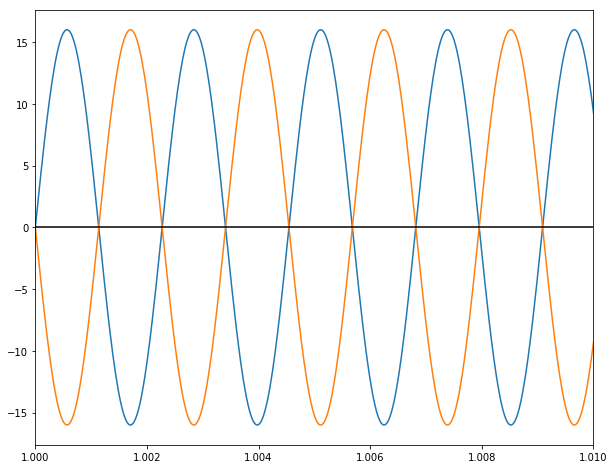

In [15]:
'''plotting sound wave vs. time'''

plt.figure(figsize = (10, 8))
plt.plot(time_pts, Atone)
plt.plot(time_pts, Atone_pi)

Atone_cancel = Atone + Atone_pi
plt.plot(time_pts, Atone + Atone_pi, 'k')

plt.xlim((1., 1.01))
plt.show()

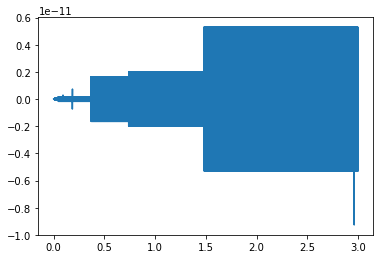

In [16]:
'''
Digital sound cancelling!!
'''

# note the vertical scale
plt.plot(time_pts, Atone_cancel)
plt.show()
write('Atone_cancel.wav', sample_rate, Atone_cancel)
#os.system("afplay Atone_cancel.wav") 

# it didn't work, why?  
# Audio automatically adjusts the sound level
Audio(Atone_cancel, rate = sample_rate)

# let's ignore sound levels that are too low
# Atone_cancel[Atone_cancel < 1e-7] = 0
# Audio(Atone_cancel, rate = sample_rate)


## Breakout Excercise
- ## Increase frequency by 0.5%; call the new sound data Atone_plus
- ## Plot the original A tone data and the new Atone_plus data.
- ## Create a sound file for Atone_plus (for mac users)
- ## Add Atone and Atone_plus and call the sum Atone_comb, and plot it
- ## Make a sound file using Atone_comb and play it

In [19]:
'''Play the A tone at 440 Hz '''

freq = 440. * 1.005
# number of points per second
# Audio CD, also most commonly used with MPEG-1 audio (VCD, SVCD, MP3)
# Or sampling frequency -- this is twice as high 
# as the highest frequency the human ear can hear
sample_rate = 44100

# a 3 second long signal
duration = 3
# make sure you understand what linspace generates here
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**4
Atone_plus = amp*np.sin(np.pi*2*freq*time_pts)
write('Atone_plus.wav', sample_rate, Atone)
# The following only works on Mac
#os.system("afplay Atone.wav") 

# for non-Mac students:
Audio(Atone_plus, rate = sample_rate)

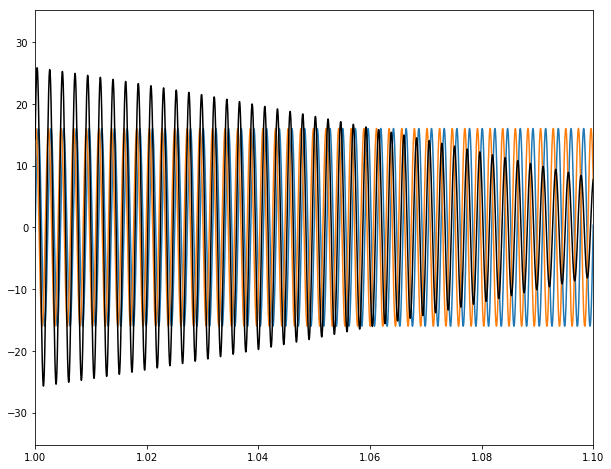

In [24]:
'''plotting sound wave vs. time'''

plt.figure(figsize = (10, 8))
plt.plot(time_pts, Atone)
plt.plot(time_pts, Atone_plus)

Atone_comb = Atone + Atone_plus
plt.plot(time_pts, Atone_comb, "k")

plt.xlim((1., 1.1))
plt.show()

In [25]:
Audio(Atone_comb, rate = sample_rate)

## The Physics of it:

## $${\sin(2\pi f_{1}t)+\sin(2\pi f_{2}t)}={2\sin \left(2\pi {\frac {f_{1}+f_{2}}{2}}t\right)\cos \left(2\pi {\frac {f_{1}-f_{2}}{2}}t\right)}$$

- ### If $f_1$ and $f_2$ are close, then the first factor is a sound wave very approximately at the same frequecy as $f_1$ but twice as loud.  

- ### The second factor is at a much lower frequency (in our case 0.05\*400 = 20 Hz) -- it "modulates" the sound wave that corresponds to the first factor.

## End of week 7-2